In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import nltk
import seaborn as sn
from sklearn.feature_extraction import DictVectorizer
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

In [2]:
# load data
train = pd.read_csv('SEM2012_training_data_with_features.csv', sep=",", header=0)
dev = pd.read_csv('SEM2012_validation_data_with_features.csv', sep=",", header=0)


In [10]:
# train_ins = train[['token_no_stop','lemma','pos','prev_lemma','next_lemma','prev_pos','next_pos','snowball_stemmer',
#                 'porter_stemmer','head','dependency','is_part_of_negation','has_prefix','has_postfix','has_infix',
#                 'base_in_dictionary','has_apostrophe']].to_dict('records')
# dev_ins = dev[['token_no_stop','lemma','pos','prev_lemma','next_lemma','prev_pos','next_pos','snowball_stemmer',
#                 'porter_stemmer','head','dependency','is_part_of_negation','has_prefix','has_postfix','has_infix',
#                 'base_in_dictionary','has_apostrophe']].to_dict('records')

train_ins = train[['token_no_stop']].to_dict('records')
dev_ins = dev[['token_no_stop']].to_dict('records')

In [11]:
vec = DictVectorizer()
x_train = vec.fit_transform(train_ins)
x_dev = vec.transform(dev_ins)

In [12]:
x_train.shape
x_train.toarray()
x_dev.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
y_train = train.label.to_list()
y_dev = dev.label.to_list()


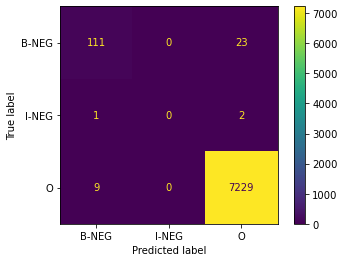

In [14]:
clf = LinearSVC()
clf.fit(x_train, y_train)

plot_confusion_matrix(clf, x_dev, y_dev)  
plt.show()

In [16]:
parameters = dict(
    C= (0.01, 0.1, 1.0),
    loss = ('hinge', 'squared_hinge'),
    tol = (1e-4, 1e-3, 1e-2, 1e-1)
)

grid = GridSearchCV(estimator = clf, param_grid=parameters, cv=5, scoring='f1_macro')
grid.fit(x_train, y_train)
clf = grid.best_estimator_
print(grid.best_params_)

{'C': 1.0, 'loss': 'hinge', 'tol': 0.0001}


In [17]:

predictions = clf.predict(x_dev)
dev['SVM'] = predictions
clsf_report =pd.DataFrame(classification_report(y_true = dev['label'], y_pred = dev['SVM'], output_dict=True)).transpose()
print(clsf_report)

              precision    recall  f1-score      support
B-NEG          0.917355  0.828358  0.870588   134.000000
I-NEG          0.000000  0.000000  0.000000     3.000000
O              0.996554  0.998757  0.997654  7238.000000
accuracy       0.995254  0.995254  0.995254     0.995254
macro avg      0.637970  0.609038  0.622747  7375.000000
weighted avg   0.994709  0.995254  0.994939  7375.000000


/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravimeijer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
